<h1>
Week 2
</h1>
<h2>
Task 2: Rejection method
</h2>
<h3>
The aim in this notebook is to selectively include or exclude parts of a sample to perform computations. This allows us to extract non-trivial results from otherwise flat distributions
</h3>

In [1]:
# A few useful import statements
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt 
plt.rcParams['text.usetex'] = True

<p style="font-size:20px">
A classic example of a Monte Carlo integral with rejection method is to calculate a value of $\pi$.
<br>
The idea is to use what we know about the area of the circle and a square that encases it. A box must be of length $L=2R$ to encase a circle of radius $R$.
    $$ \frac{A_{\rm circle}}{A_{\rm square}} = \frac{\pi R^2}{L^2} = \frac{\pi R^2}{4R^2} = \frac{\pi}{4} $$
<br>
All that is missing is to estimate the ratio of areas using MC techniques! Let's first populate a square spanning $[-1,1]$ in both $x$ and $y$.
</p>

In [24]:
square_sample = rand.uniform(-1, +1, size=(1_000_000_0, 2))

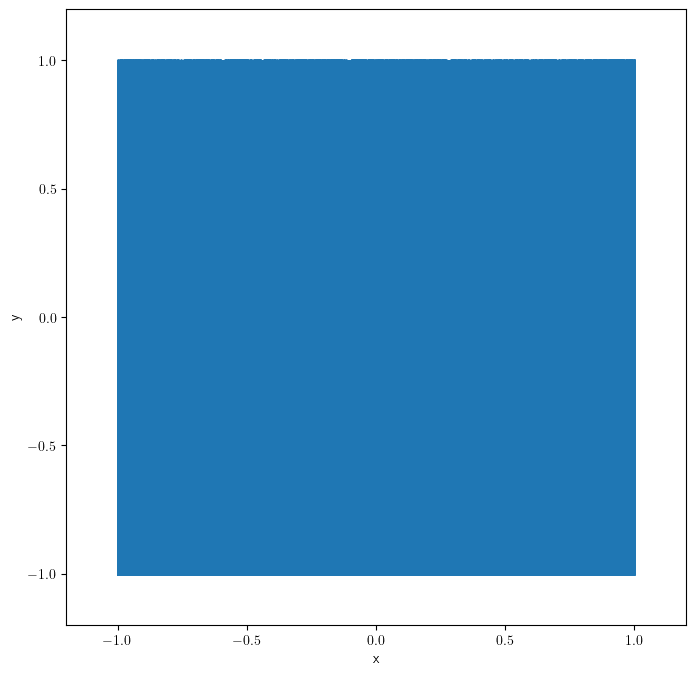

<Figure size 640x480 with 0 Axes>

In [25]:
# Create figure and set label
fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2), xlabel="x", ylabel="y")

# Scatter the points
ax.scatter(square_sample[:,0], square_sample[:,1], s=1)

# Plot and close the figure
plt.show()
plt.clf()

<p style="font-size:20px">
Now lets figure out which points are inside or outside of the circle. We will use <a href="https://numpy.org/doc/stable/reference/generated/numpy.where.html"> numpy.where</a>, which is sometimes a tricky function to get right. Feel free to use a more standard for loop instead.
</p>

In [26]:
in_circle = np.where(square_sample[:,0]**2 + square_sample[:,1]**2 <= 1)
out_circle = np.where(square_sample[:,0]**2 + square_sample[:,1]**2 > 1)

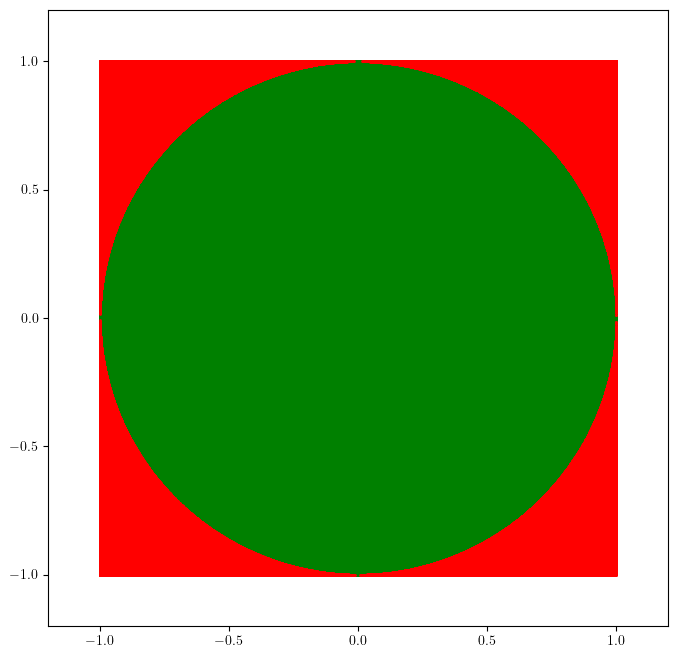

<Figure size 640x480 with 0 Axes>

In [27]:
# Create figure and axis object
fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

# Scatter points inside and outside with different colours
# (feel free to change the colours if you are red/green colour-blind!)
ax.scatter(square_sample[in_circle,0], square_sample[in_circle,1], s=1, color="green")
ax.scatter(square_sample[out_circle,0], square_sample[out_circle,1], s=1, color="red")

# Plot and close figure
plt.show()
plt.clf()

<p style="font-size:20px;color:blue">
$\cdot$ Use the samples above to estimate the value of $\pi$ with the formula given at the start of the notebook
<br><br>
$\cdot$ Can you estimate the error on the value of $\pi$?
<br><br>
$\cdot$ Calculate $\pi$ with growing sample size, and demonstrate the method converges towards the expected value.
</p>

<hr style="height:1px;width:75%">

In [28]:
# Count points inside the unit circle
inside_circle = np.sum(square_sample[:, 0]**2 + square_sample[:, 1]**2 <= 1)

# Estimate π using the Monte Carlo method
pi_estimate = 4 * (inside_circle / 1_000_000_0)
print(pi_estimate)

3.1415704


In [7]:
p = inside_circle / 10_000
# Compute variance of f(x)
sigma_f_squared = (16 * p) - (4 * p) ** 2
sigma_f = np.sqrt(sigma_f_squared)

# Compute Monte Carlo error
sigma_MC = (4 / np.sqrt(10_000)) * sigma_f
print(sigma_MC)


0.06616010447391993


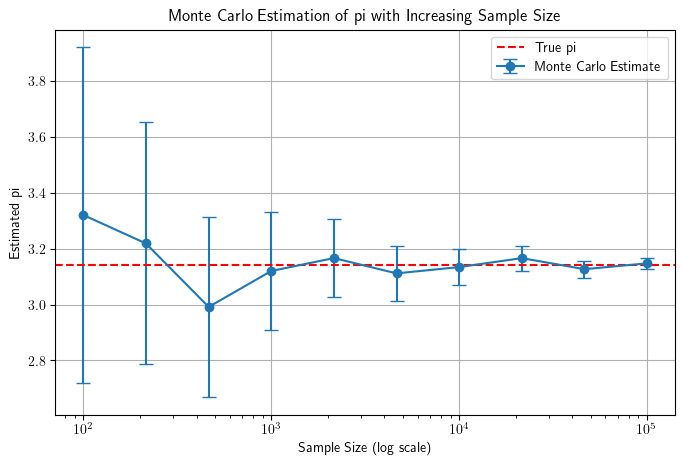

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

# Define different sample sizes
sample_sizes = np.logspace(2, 5, num=10, dtype=int)  # From 100 to 100000 samples

# Store results
pi_estimates = []
errors = []

for N in sample_sizes:
    # Generate random points
    samples = rand.uniform(-1, +1, size=(N, 2))

    # Count points inside the unit circle
    inside_circle = np.sum(samples[:, 0]**2 + samples[:, 1]**2 <= 1)

    # Estimate pi
    pi_estimate = 4 * (inside_circle / N)
    pi_estimates.append(pi_estimate)

    # Compute sigma_f and error
    p = inside_circle / N
    sigma_f = np.sqrt((16 * p) - (4 * p) ** 2)
    sigma_MC = (4 / np.sqrt(N)) * sigma_f
    errors.append(sigma_MC)

# Plot results
plt.figure(figsize=(8, 5))
plt.errorbar(sample_sizes, pi_estimates, yerr=errors, fmt='o-', capsize=5, label="Monte Carlo Estimate")
plt.axhline(y=np.pi, color='r', linestyle='--', label="True pi")
plt.xscale("log")
plt.xlabel("Sample Size (log scale)")
plt.ylabel("Estimated pi")
plt.title("Monte Carlo Estimation of pi with Increasing Sample Size")
plt.legend()
plt.grid(True)
plt.show()
plt.clf()

<p style="font-size:20px;color:blue">
$\cdot$ Bonus question: Use MC methods to calculate the volume of a unit sphere. Check your answer.
<br><br>
$\cdot$ Bonus bonus question: Generalise your code to calculate the hypervolume of a sphere in $N$ dimensions.
</p>